# Import Library dan Packages

In [ ]:
# Packages untuk analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages untuk visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# tampilkan chart 
%matplotlib inline

# Packages Pickle 
import pickle

# Import Dataset

In [ ]:
# import data csv yang ada
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


# Mempersiapkan data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


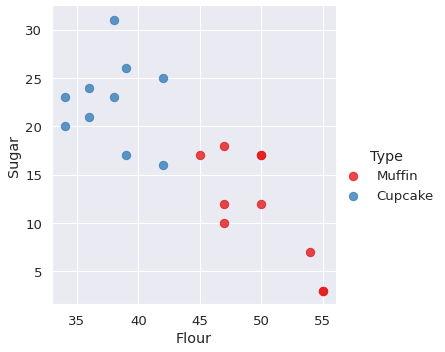

In [ ]:
# tampilkan plot 2 bahan
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [ ]:
# Inputkan modelnya
ingredients = recipes[['Flour','Sugar']].to_numpy()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

# Memasukkan Model SVM

In [ ]:
# masukkan model svm
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

# Visualisai Hasil

In [ ]:
# Dapatkan pemisah dari hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Masukkan plot paralel ke hyperplane pemisah yang melewati support vektor 
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


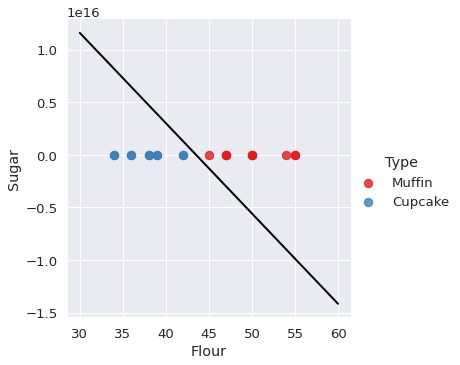

In [ ]:
# Tampilkan plot dari hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


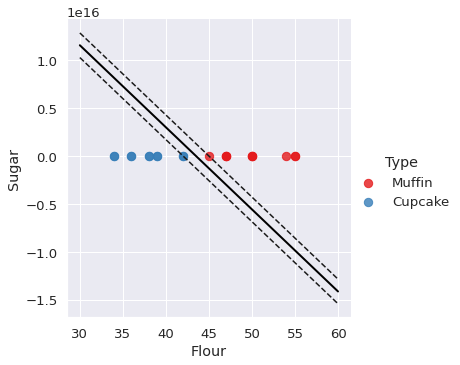

In [ ]:
# Lihat margin dan support vectornya
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

# Prediksi Kasus Baru

In [ ]:
# Buat fungsi untuk memprediksi kapan resep itu apakah itu muffin atau cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [ ]:
# Prediksi jika menggunakan bahan: 50 tepung dan 20 gula
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


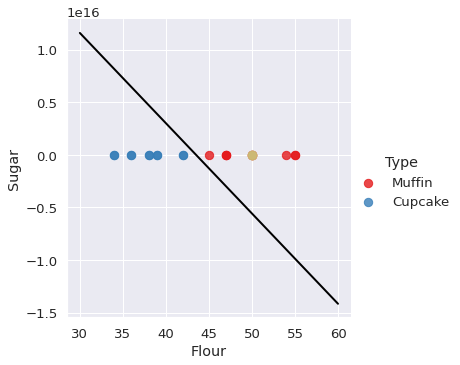

In [ ]:
# Tampilkan titik plot untuk melihat secara visual di mana titik itu berada
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [ ]:
# Prediksi jika memakai bahan: 40 tepung dan 20 gula
muffin_or_cupcake(40,20)

You're looking at a cupcake recipe!


In [ ]:
# melihat komposisi cupcake
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}
muffin_cupcake_dict

{'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt'],
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'muffin_cupcake_model': SVC(kernel='linear')}